# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 150)
sns.set_palette(palette)

## Load Data

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

## Define Functions for Plotting¶

In [3]:
# Define some function for plotting
def get_sub_plot(label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 5)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_dist(df, bins):
    ax = get_sub_plot()
    sns.distplot(df, ax = ax, bins = bins)
    plt.show()

## Is the distribution of body temperatures normal? 
> <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
> <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

Visualize fistribution of body temperature first:

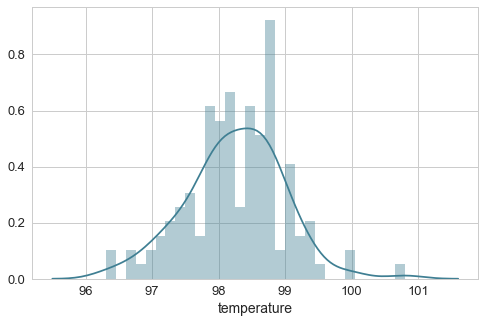

In [4]:
plot_dist(df['temperature'], bins = 30)

Then do normality test.
Scipy do offer normality test:
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.normaltest.html

> Returns:
> * k2 : float or array
> -- s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.
> * p-value : float or array
> -- A 2-sided chi squared probability for the hypothesis test.

In [5]:
from scipy.stats import normaltest

normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

As pvalue is 0.25, body temperatures are normally distributed.

## Is the sample size large? Are the observations independent?
> <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

> Is the sample size large?

Based on the definition of Central Limit Theorem in https://onlinecourses.science.psu.edu/stat500/book/export/html/25,

> For a large sample size (rule of thumb: n ≥ 30), the data is approximately normally distributed, regardless of the distribution of the population one samples from.

Here we have 130 data points, hence is considered large sample size.

> Are the observations independent?

And yes, observations of blood temperatures, gender & heart rate of an individual human, which does not depend on each other, should be independent.

## Is the true population mean really 98.6 degrees F?
> <li> First, try a bootstrap hypothesis test.
> <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
> <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
> <li> Now try using the other test. How is the result be different? Why?

> First, try a bootstrap hypothesis test.

Null Hypothosis: population mean is 98.6 degrees F

Test Statistic: mean of body temperature

In [6]:
def diff_from_carl(data, temperature = 98.6):
    return np.mean(data) - 98.6

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates
    
diff_obs = diff_from_carl(df['temperature'])
df['shifted_temperature'] = df['temperature'] - np.mean(df['temperature']) + 98.6
bs_replicates = draw_bs_reps(df['shifted_temperature'], diff_from_carl, 10000)
p_value = np.sum(bs_replicates <= diff_obs) / len(bs_replicates)
p_value

0.0

> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

I would use a one-sample test because we have a list of temperature data and a population mean. We are not having two list of temperature data for permutation.

> In this situation, is it appropriate to use the $t$ or $z$ statistic? 

According to http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/

> The general rule of thumb for when to use a t score is when your sample:

> Has a sample size below 30,

> Has an unknown population standard deviation.

> You must know the standard deviation of the population and your sample size should be above 30 in order for you to be able to use the z-score. Otherwise, use the t-score.

As we don't know the standard deviation of population standard diviation, t score would be better.

> <li> Now try using the other test. How is the result be different? Why?

Perform Z Test:

In [7]:
from statsmodels.stats.weightstats import ztest

ztest(x1 = df['temperature'], value = 98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

Perform T Test:

In [8]:
from scipy.stats import ttest_1samp

ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

p value of all tests are very small. We can reject the null hypothesis.

## Draw a small sample of size 10 from the data and repeat both frequentist tests. 
> <li> Which one is the correct one to use? 
> <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

In [9]:
# Draw only 10 sample
small_sample = np.random.choice(df['temperature'], 10)

In [10]:
# First, try a bootstrap hypothesis test.
diff_obs = diff_from_carl(small_sample)
small_sample_shifted = small_sample - np.mean(small_sample) + 98.6
bs_replicates = draw_bs_reps(small_sample_shifted, diff_from_carl, 10000)
p_value = np.sum(bs_replicates <= diff_obs) / len(bs_replicates)
p_value

0.1085

In [11]:
# Perform Z Test
ztest(x1 = small_sample, value = 98.6)

(-1.243987148552899, 0.21350429283370165)

In [12]:
# Perform T Test
ttest_1samp(small_sample, 98.6)

Ttest_1sampResult(statistic=-1.243987148552899, pvalue=0.24492759065418479)

> <li> Which one is the correct one to use? 

T score is the one to use since sample size is below 30.

> <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    
p value are larger when sample size is smaller. We are less confident to reject the null hypothesis.

## At what temperature should we consider someone's temperature to be "abnormal"?
> <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
> <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

## Is there a significant difference between males and females in normal temperature?
> <li> What testing approach did you use and why?
> <li> Write a story with your conclusion in the context of the original problem.